[https://github.com/clawpack/pyclaw/blob/master/examples/shallow_1d/sill.py]

# Shallow water flow

Solve the one-dimensional shallow water equations including bathymetry:
.. math::
    h_t + (hu)_x & = 0 \\
    (hu)_t + (hu^2 + \frac{1}{2}gh^2)_x & = -g h b_x.
Here h is the depth, u is the velocity, g is the gravitational constant, and b
the bathymetry. 

In [20]:
from __future__ import absolute_import
from clawpack.pyclaw.util import run_app_from_main
import numpy
from clawpack import riemann
import petsc4py
from clawpack import petclaw as pyclaw
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [39]:
#!/usr/bin/env python
# encoding: utf-8

def setup(kernel_language='Fortran', solver_type='classic', use_petsc=False,
          outdir='./_output'):

    if use_petsc:
        import clawpack.petclaw as pyclaw
    else:
        from clawpack import pyclaw

    if kernel_language == 'Fortran':
        solver = pyclaw.ClawSolver1D(riemann.shallow_bathymetry_fwave_1D)
        print('cool')
    elif kernel_language == 'Python':
        solver = pyclaw.ClawSolver1D(riemann.shallow_1D_py.shallow_fwave_1d)
        solver.kernel_language = 'Python'
    solver.limiters = pyclaw.limiters.tvd.vanleer
    solver.fwave = True
    solver.num_waves = 2
    solver.num_eqn = 2
    solver.bc_lower[0] = pyclaw.BC.extrap
    solver.bc_upper[0] = pyclaw.BC.extrap
    solver.aux_bc_lower[0] = pyclaw.BC.extrap
    solver.aux_bc_upper[0] = pyclaw.BC.extrap

    xlower = -1.0
    xupper = 1.0
    x = pyclaw.Dimension( xlower, xupper, 1000, name='x')
    domain = pyclaw.Domain(x)
    state = pyclaw.State(domain, 2, 1)

    # Gravitational constant
    state.problem_data['grav'] = 9.8
    state.problem_data['dry_tolerance'] = 1e-3
    state.problem_data['sea_level'] = 0.0

    xc = state.grid.x.centers
    state.aux[0, :] = 0.8 * numpy.exp(-xc**2 / 0.2**2) - 1.0
    state.q[0, :] = 0.1 * numpy.exp(-(xc + 0.4)**2 / 0.2**2) - state.aux[0, :]
    state.q[1, :] = 0.0

    claw = pyclaw.Controller()
    claw.keep_copy = True
    claw.tfinal = 1.0
    claw.solution = pyclaw.Solution(state, domain)
    claw.solver = solver
    claw.write_aux_init = True

    return claw, state, domain


In [40]:
claw,state,domain = setup(kernel_language='Fortran', solver_type='classic', use_petsc=True,
          outdir='./_output')

cool


In [41]:
claw.run()

2019-04-11 19:56:25,773 INFO CLAW: Solution 0 computed for time t=0.000000
2019-04-11 19:56:25,837 INFO CLAW: Solution 1 computed for time t=0.100000
2019-04-11 19:56:25,884 INFO CLAW: Solution 2 computed for time t=0.200000
2019-04-11 19:56:25,932 INFO CLAW: Solution 3 computed for time t=0.300000
2019-04-11 19:56:25,986 INFO CLAW: Solution 4 computed for time t=0.400000
2019-04-11 19:56:26,040 INFO CLAW: Solution 5 computed for time t=0.500000
2019-04-11 19:56:26,097 INFO CLAW: Solution 6 computed for time t=0.600000
2019-04-11 19:56:26,148 INFO CLAW: Solution 7 computed for time t=0.700000
2019-04-11 19:56:26,197 INFO CLAW: Solution 8 computed for time t=0.800000
2019-04-11 19:56:26,248 INFO CLAW: Solution 9 computed for time t=0.900000
2019-04-11 19:56:26,297 INFO CLAW: Solution 10 computed for time t=1.000000


{'cflmax': 0.9007309691209641,
 'dtmin': 0.0005357995698701558,
 'dtmax': 0.0005742905997670033,
 'numsteps': 1809}

In [30]:
xc = state.grid.x.centers
aux0 = 0.8 * numpy.exp(-xc**2 / 0.2**2) - 1.0
h0 = 0.1 * numpy.exp(-(xc + 0.4)**2 / 0.2**2) - state.aux[0, :]
u0 = np.zeros(len(xc))
s0 = h0 + state.aux[0, :]

h1 = claw.frames[1].q[0,:]
u1 = claw.frames[1].q[1,:]/h1
s01 = h1 +  state.aux[0, :]

hf = claw.frames[claw.num_output_times].q[0,:]
uf = claw.frames[claw.num_output_times].q[1,:]/hf
sf = hf +  state.aux[0, :]




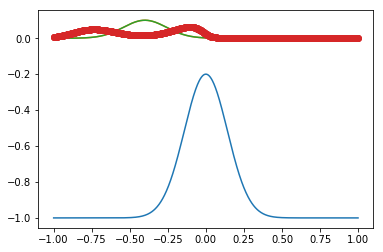

In [31]:
plt.plot(xc,aux0)
plt.plot(xc,aux0+h0)

plt.plot(xc,s0)
plt.plot(xc,s01,'o')

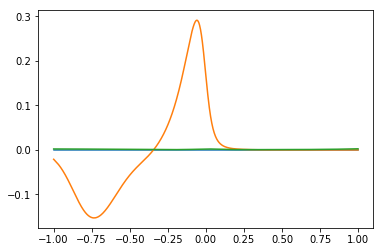

In [32]:
plt.plot(xc,u0)
plt.plot(xc,u1)
plt.plot(xc,uf)

In [18]:
claw.frames[claw.num_output_times].q.shape

(2, 20)

array([[ 1.04450557e+00,  1.04394338e+00,  1.04343227e+00,
         1.04290470e+00,  1.04236336e+00,  1.04180923e+00,
         1.04124330e+00,  1.04066657e+00,  1.04007998e+00,
         1.03948450e+00,  1.03888103e+00,  1.03827050e+00,
         1.03765380e+00,  1.03703178e+00,  1.03640531e+00,
         1.03577522e+00,  1.03514232e+00,  1.03450741e+00,
         1.03387127e+00,  1.03323466e+00,  1.03259833e+00,
         1.03196298e+00,  1.03132934e+00,  1.03069807e+00,
         1.03006984e+00,  1.02944530e+00,  1.02882507e+00,
         1.02820975e+00,  1.02759992e+00,  1.02699614e+00,
         1.02639894e+00,  1.02580884e+00,  1.02522634e+00,
         1.02465189e+00,  1.02408595e+00,  1.02352894e+00,
         1.02298125e+00,  1.02244326e+00,  1.02191530e+00,
         1.02139772e+00,  1.02089080e+00,  1.02039481e+00,
         1.01991000e+00,  1.01943659e+00,  1.01897477e+00,
         1.01852472e+00,  1.01808657e+00,  1.01766045e+00,
         1.01724645e+00,  1.01684463e+00,  1.01645505e+0